In [44]:
"""
3D mexican hat, in cartesian coords
"""

import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

def mexican_hat_potential(x, y, b, a=1):
    return a * ((x**2 + y**2) - b**2)**2

def plot_mexican_hat_gif(b_values, gif_name='mexican_hat_3D_cart_minus.gif'):
    """
    Creates a GIF that cycles through the Mexican hat potential for each b value.

    Args:
        - b_values: List or array of b values for the Mexican hat potential.
        - gif_name: Str: Name of the output GIF file.
    """
    x = np.linspace(-2, 2, 500)
    y = np.linspace(-2, 2, 500)
    X, Y = np.meshgrid(x, y)

    filenames = []

    for i, value in enumerate(b_values):
        Z = mexican_hat_potential(X, Y, value)

        fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 6))
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.set_zlim(0, 50)
        surface = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none", alpha=0.7)

        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Potential V(x, y)')
        ax.set_title(f'Mexican Hat Potential with b = {value:.2f}')

        filename = f'frame_{i}.png'
        plt.savefig(filename)
        plt.close(fig)
        filenames.append(filename)

    with imageio.get_writer(gif_name, mode='I', duration=0.5) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    for filename in filenames:
        os.remove(filename)

    print(f'GIF saved as {gif_name}')

# Example usage
b_values = np.linspace(-5, 3, 50)
plot_mexican_hat_gif(b_values)


/var/folders/rh/7blq947d6s9d_5cpytnb2pxm0000gn/T/ipykernel_67212/633716044.py:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as mexican_hat_3D_cart_minus.gif


In [34]:
"""
2D mexican hat, in polar coords
"""

import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Define the Mexican hat potential in polar coordinates (r, theta)
def mexican_hat_potential_polar(r, b, a=1):
    return a * (r**2 - b**2)**2

# Function to create a GIF showing the Mexican hat potential in polar coordinates
def plot_mexican_hat_gif_polar(b_values, gif_name='mexican_hat_2D_polar.gif'):
    """
    Creates a GIF that cycles through the Mexican hat potential in polar coordinates for each b value.

    Args:
        - b_values: List or array of b values for the Mexican hat potential.
        - gif_name: Str: Name of the output GIF file.
    """
    r = np.linspace(0, 2, 500)  # radial distance
    theta = np.linspace(0, 2 * np.pi, 500)  # angular component
    R, Theta = np.meshgrid(r, theta)

    filenames = []

    for i, value in enumerate(b_values):
        Z = mexican_hat_potential_polar(R, value)

        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='polar')

        # Polar plot, where Z is represented as a color gradient
        c = ax.contourf(Theta, R, Z, cmap='viridis', alpha=0.7)
        plt.colorbar(c, ax=ax, label='Potential V(r, θ)')

        ax.set_title(f'Mexican Hat Potential with b = {value:.2f} (Polar Coordinates)')

        # Save the plot to a file
        filename = f'frame_{i}.png'
        plt.savefig(filename)
        plt.close(fig)
        filenames.append(filename)

    # Create GIF
    with imageio.get_writer(gif_name, mode='I', duration=1.0) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    for filename in filenames:
        os.remove(filename)

    print(f'GIF saved as {gif_name}')

# Example usage
b_values = np.linspace(0, 3, 20)
plot_mexican_hat_gif_polar(b_values)


/var/folders/rh/7blq947d6s9d_5cpytnb2pxm0000gn/T/ipykernel_67212/4070041395.py:50: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as mexican_hat_2D_polar.gif


In [39]:
"""
3D mexican hat, polar coords
"""

import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Define the Mexican hat potential in polar coordinates (r, theta)
def mexican_hat_potential_polar(r, b, a=1):
    return a * (r**2 - b**2)**2

# Convert polar coordinates (r, theta) to Cartesian (x, y) for 3D plotting
def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Function to create a GIF showing the Mexican hat potential in polar coordinates in 3D
def plot_mexican_hat_gif_polar_3D(b_values, gif_name='mexican_hat_3D_polar_2.gif'):
    """
    Creates a GIF that cycles through the Mexican hat potential in 3D for each b value.

    Args:
        - b_values: List or array of b values for the Mexican hat potential.
        - gif_name: Str: Name of the output GIF file.
    """
    r = np.linspace(0, 2, 500)  # radial distance
    theta = np.linspace(0, 2 * np.pi, 500)  # angular component
    R, Theta = np.meshgrid(r, theta)

    # Convert polar grid to Cartesian for 3D plotting
    X, Y = polar_to_cartesian(R, Theta)

    filenames = []

    for i, value in enumerate(b_values):
        Z = mexican_hat_potential_polar(R, value)

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        # 3D surface plot using polar coordinates converted to Cartesian
        surface = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none", alpha=0.7)

        # Set axes limits
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_zlim(0, np.max(Z))

        # Axis labels and title
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Potential V(r, θ)')
        ax.set_title(f'Mexican Hat Potential with b = {value:.2f} (3D Polar Coordinates)')

        # Save the plot to a file
        filename = f'frame_{i}.png'
        plt.savefig(filename)
        plt.close(fig)
        filenames.append(filename)

    # Create GIF
    with imageio.get_writer(gif_name, mode='I', duration=0.5) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    for filename in filenames:
        os.remove(filename)

    print(f'GIF saved as {gif_name}')

# Example usage
b_values = np.linspace(0, 1.6, 36)
plot_mexican_hat_gif_polar_3D(b_values)


/var/folders/rh/7blq947d6s9d_5cpytnb2pxm0000gn/T/ipykernel_67212/66823546.py:67: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as mexican_hat_3D_polar_2.gif


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

def mexican_hat_potential(x, y, b, a=1):
    return a * ((x**2 + y**2) - b**2)**2

def plot_mexican_hat_gif(b_values, gif_name='mexican_hat_2.gif'):
    """
    Creates a GIF that cycles through the Mexican hat potential for each b value in 2D.

    Args:
        - b_values: List or array of b values for the Mexican hat potential.
        - gif_name: Str: Name of the output GIF file.
    """
    # Create a meshgrid for the X and Y values
    x = np.linspace(-3, 3, 500)
    y = np.linspace(-3, 3, 500)
    X, Y = np.meshgrid(x, y)

    # Create a list to hold filenames of individual plot images
    filenames = []

    for i, value in enumerate(b_values):
        Z = mexican_hat_potential(X, Y, value)

        # Create a new figure for each subplot
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        c = ax.contourf(X, Y, Z, levels=50, cmap='viridis')  # 2D contour plot
        fig.colorbar(c, ax=ax, label='Potential V(x, y)')  # Add color bar

        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_title(f'Mexican Hat Potential with b = {value:.2f}')

        # Save the current figure to a temporary file
        filename = f'frame_{i}.png'
        plt.savefig(filename)
        plt.close(fig)  # Close the figure to avoid display
        filenames.append(filename)

    # Create a GIF from the saved frames
    with imageio.get_writer(gif_name, mode='I', duration=0.5) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Optionally, clean up the temporary files
    for filename in filenames:
        os.remove(filename)

    print(f'GIF saved as {gif_name}')

# Example usage
b_values = np.linspace(0, 3, 40)
plot_mexican_hat_gif(b_values)


/var/folders/rh/7blq947d6s9d_5cpytnb2pxm0000gn/T/ipykernel_67212/1431182035.py:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as mexican_hat_2.gif


In [25]:
# import numpy as np
# import matplotlib.pyplot as plt

# def mexican_hat_potential(x, y, b, a=1):
#     """Calculate the Mexican hat potential."""
#     return a * ((x**2 + y**2) - b**2)**2

# def hamiltonian(kx, ky, b):
#     """Define the Hamiltonian matrix for the system."""
#     # Simple model for demonstration; you may need to adjust this.
#     # A 2x2 Hamiltonian for a particle in a Mexican hat potential
#     # This is a simplistic model; replace with your actual Hamiltonian.
#     return np.array([[kx**2 + ky**2 + mexican_hat_potential(kx, ky, b), 0],
#                      [0, kx**2 + ky**2 + mexican_hat_potential(kx, ky, b)]])
                     
# def berry_connection(kx, ky, b):
#     """Calculate the Berry connection A."""
#     h1 = hamiltonian(kx, ky, b)
#     eigenvalues, eigenstates = np.linalg.eig(h1)
    
#     # Take the lowest eigenstate
#     idx = np.argmin(eigenvalues)
#     state = eigenstates[:, idx]

#     # Compute the derivative w.r.t kx and ky
#     d_state_dx = np.array([np.real(state[0] + 1j*state[1]) for i in np.linspace(kx - 0.01, kx + 0.01, 3)])[1]
#     d_state_dy = np.array([np.real(state[0] + 1j*state[1]) for i in np.linspace(ky - 0.01, ky + 0.01, 3)])[1]

#     # Berry connection
#     A_x = -1j * np.conj(state) @ d_state_dx
#     A_y = -1j * np.conj(state) @ d_state_dy
#     return A_x, A_y

# def berry_curvature(kx, ky, b):
#     """Calculate the Berry curvature F."""
#     A_x, A_y = berry_connection(kx, ky, b)
#     # Approximate curvature as curl of the Berry connection
#     return np.gradient(A_y, kx) - np.gradient(A_x, ky)

# def compute_chern_number(b):
#     """Compute the Chern number for a given b value."""
#     k_points = np.linspace(-np.pi, np.pi, 50)  # Discretize momentum space
#     chern_number = 0

#     # Calculate the Berry curvature and integrate over the Brillouin zone
#     for i in range(len(k_points) - 1):
#         for j in range(len(k_points) - 1):
#             kx = k_points[i]
#             ky = k_points[j]
#             F = berry_curvature(kx, ky, b)

#             # Numerical integration (using the trapezoidal rule)
#             chern_number += F * (kx[1] - kx[0]) * (ky[1] - ky[0]) / (2 * np.pi)

#     return chern_number

# # Example usage
# b_values = np.linspace(2, -2, 5)
# chern_numbers = [compute_chern_number(b) for b in b_values]

# # Print results
# for b, c in zip(b_values, chern_numbers):
#     print(f"Chern number for b = {b:.2f}: {c:.2f}")














import numpy as np

def mexican_hat_potential(x, y, b, a=1):
    """Calculate the Mexican hat potential."""
    return a * ((x**2 + y**2) - b**2)**2

def hamiltonian(kx, ky, b):
    """Define the Hamiltonian matrix for the system."""
    # Simple model for demonstration; replace with your actual Hamiltonian.
    return np.array([[kx**2 + ky**2 + mexican_hat_potential(kx, ky, b), 0],
                     [0, kx**2 + ky**2 + mexican_hat_potential(kx, ky, b)]])

def berry_connection(kx, ky, b):
    """Calculate the Berry connection A."""
    # Slightly perturb kx and ky to calculate finite differences
    delta = 1e-5
    h1 = hamiltonian(kx, ky, b)
    eigenvalues, eigenstates = np.linalg.eig(h1)

    # Take the lowest eigenstate
    idx = np.argmin(eigenvalues)
    state = eigenstates[:, idx]

    # Perturb in kx direction
    h1_kx_plus = hamiltonian(kx + delta, ky, b)
    h1_kx_minus = hamiltonian(kx - delta, ky, b)
    
    # Perturb in ky direction
    h1_ky_plus = hamiltonian(kx, ky + delta, b)
    h1_ky_minus = hamiltonian(kx, ky - delta, b)

    # Calculate perturbed states
    state_kx_plus = np.linalg.eig(h1_kx_plus)[1][:, idx]
    state_kx_minus = np.linalg.eig(h1_kx_minus)[1][:, idx]
    
    state_ky_plus = np.linalg.eig(h1_ky_plus)[1][:, idx]
    state_ky_minus = np.linalg.eig(h1_ky_minus)[1][:, idx]

    # Calculate the derivatives (Berry connection)
    d_state_dx = (state_kx_plus - state_kx_minus) / (2 * delta)
    d_state_dy = (state_ky_plus - state_ky_minus) / (2 * delta)

    # Compute Berry connection components
    A_x = -1j * np.conj(state) @ d_state_dx
    A_y = -1j * np.conj(state) @ d_state_dy
    
    return A_x.real, A_y.real

def berry_curvature(kx, ky, b):
    """Calculate the Berry curvature F."""
    A_x, A_y = berry_connection(kx, ky, b)

    # Create a grid of kx and ky to evaluate the gradient
    kx_grid = np.array([kx])  # Create a grid with a single kx value
    ky_grid = np.array([ky])  # Create a grid with a single ky value
    
    # Calculate the gradient of the Berry connection
    A_x_gradient = np.gradient(A_x, kx_grid, axis=0)  # Gradient in the kx direction
    A_y_gradient = np.gradient(A_y, ky_grid, axis=0)  # Gradient in the ky direction

    # Calculate the Berry curvature as curl of the Berry connection
    F = A_y_gradient[0] - A_x_gradient[0]  # Extract the first element from the gradients

    return F


def compute_chern_number(b):
    """Compute the Chern number for a given b value."""
    k_points = np.linspace(-np.pi, np.pi, 50)  # Discretize momentum space
    chern_number = 0

    # Calculate the Berry curvature and integrate over the Brillouin zone
    for i in range(len(k_points) - 1):
        for j in range(len(k_points) - 1):
            kx = k_points[i]
            ky = k_points[j]
            F = berry_curvature(kx, ky, b)

            # Numerical integration (using the trapezoidal rule)
            chern_number += F * (k_points[1] - k_points[0])**2 / (2 * np.pi)

    return chern_number

# Example usage
b_values = np.linspace(2, -2, 5)
chern_numbers = [compute_chern_number(b) for b in b_values]

# Print results
for b, c in zip(b_values, chern_numbers):
    print(f"Chern number for b = {b:.2f}: {c:.2f}")


AxisError: axis 0 is out of bounds for array of dimension 0

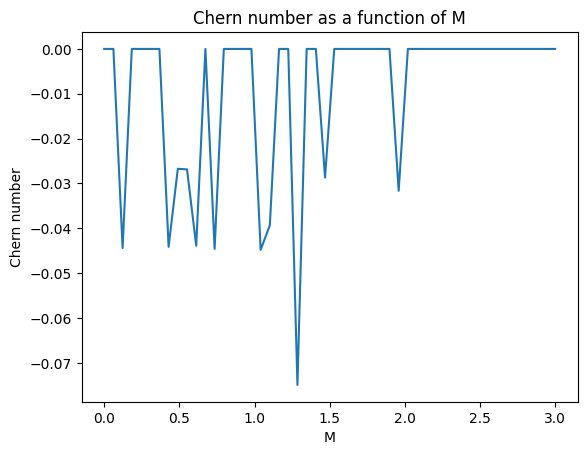

In [29]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

# Define Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Define the Hamiltonian in momentum space
def hamiltonian(kx, ky, M):
    return np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (M - np.cos(kx) - np.cos(ky)) * sigma_z

# Compute the Berry curvature at a single point
def berry_curvature(kx, ky, M, dk=1e-3):
    H = hamiltonian(kx, ky, M)
    eigvals, eigvecs = eig(H)
    
    # Take the lowest energy eigenstate
    u = eigvecs[:, np.argmin(eigvals)]
    
    # Compute neighboring points in k-space
    Hx_plus = hamiltonian(kx + dk, ky, M)
    Hy_plus = hamiltonian(kx, ky + dk, M)
    _, eigvecs_x_plus = eig(Hx_plus)
    _, eigvecs_y_plus = eig(Hy_plus)
    
    # Take the corresponding eigenstate for neighboring points
    ux_plus = eigvecs_x_plus[:, np.argmin(eig(Hx_plus)[0])]
    uy_plus = eigvecs_y_plus[:, np.argmin(eig(Hy_plus)[0])]

    # Compute Berry curvature using finite differences
    Fxy = np.imag(np.dot(np.conj(u), (ux_plus - uy_plus)) / dk)
    
    return Fxy

# Integrate Berry curvature over the Brillouin zone to calculate the Chern number
def chern_number(M, N=100):
    kx_vals = np.linspace(-np.pi, np.pi, N)
    ky_vals = np.linspace(-np.pi, np.pi, N)
    Fxy_total = 0
    
    for kx in kx_vals:
        for ky in ky_vals:
            Fxy_total += berry_curvature(kx, ky, M)
    
    C = Fxy_total / (2 * np.pi * N**2)
    return C

# Plot the Chern number as a function of M
M_vals = np.linspace(0, 3, 50)
chern_numbers = [chern_number(M) for M in M_vals]

plt.plot(M_vals, chern_numbers)
plt.xlabel('M')
plt.ylabel('Chern number')
plt.title('Chern number as a function of M')
plt.show()


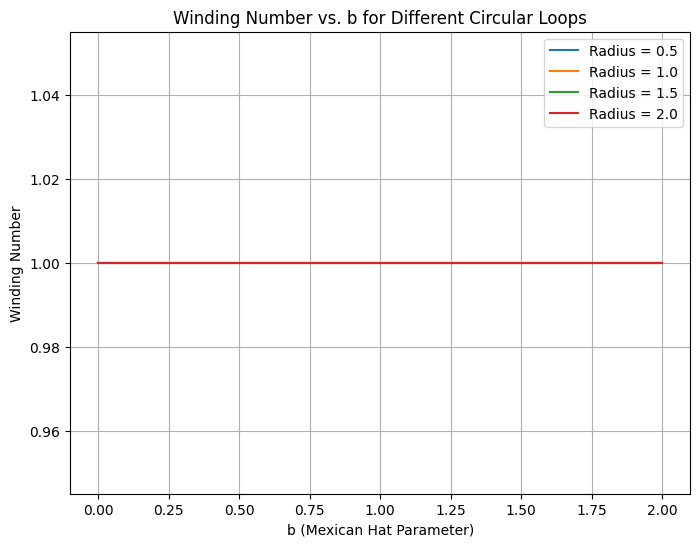

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Mexican hat potential
a = 1.0
b = 1.0

# Define the Mexican hat potential
def mexican_hat_potential(x, y, a, b):
    r_squared = x**2 + y**2
    return a * (r_squared - b)**2

# Compute the angle theta
def compute_theta(x, y):
    return np.arctan2(y, x)

# Calculate the winding number by integrating the gradient of theta along a circular loop
def winding_number(a, b, radius, num_points=100):
    # Define circular path in polar coordinates
    theta_vals = np.linspace(0, 2 * np.pi, num_points)
    x_vals = radius * np.cos(theta_vals)
    y_vals = radius * np.sin(theta_vals)
    
    # Compute the phase (theta) along the path
    phase_vals = compute_theta(x_vals, y_vals)
    
    # Compute the differences in the phase (ensure periodicity)
    dtheta = np.diff(phase_vals)
    dtheta = np.mod(dtheta + np.pi, 2 * np.pi) - np.pi  # Keep phase differences between -pi and pi
    
    # Winding number is the total phase change divided by 2*pi
    winding_num = np.sum(dtheta) / (2 * np.pi)
    return winding_num

# Test for different values of b
radii = [0.5, 1.0, 1.5, 2.0]
b_values = np.linspace(0, 2, 5)

# Plot the winding numbers for various b values
plt.figure(figsize=(8, 6))
for radius in radii:
    winding_nums = [winding_number(a, b, radius) for b in b_values]
    plt.plot(b_values, winding_nums, label=f'Radius = {radius}')
    
plt.xlabel('b (Mexican Hat Parameter)')
plt.ylabel('Winding Number')
plt.title('Winding Number vs. b for Different Circular Loops')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Define the Hamiltonian in momentum space for the 2D Chern insulator model
def hamiltonian(kx, ky, M):
    d_x = np.sin(kx)
    d_y = np.sin(ky)
    d_z = M - np.cos(kx) - np.cos(ky)
    return np.array([[d_z, d_x - 1j * d_y], [d_x + 1j * d_y, -d_z]])

# Calculate Berry curvature at a given kx, ky
def berry_curvature(kx, ky, M):
    H = hamiltonian(kx, ky, M)
    eigvals, eigvecs = eig(H)
    
    # We are interested in the eigenstate for the lower band
    eigvec = eigvecs[:, np.argmin(eigvals)]
    
    # Calculate derivatives of the eigenvector
    dkx_H = hamiltonian(kx + 1e-5, ky, M) - hamiltonian(kx - 1e-5, ky, M)
    dky_H = hamiltonian(kx, ky + 1e-5, M) - hamiltonian(kx, ky - 1e-5, M)
    
    dkx_eigvec = eig(dkx_H)[1][:, np.argmin(eigvals)]
    dky_eigvec = eig(dky_H)[1][:, np.argmin(eigvals)]
    
    # Compute Berry curvature from wavefunction overlap
    Fxy = np.imag(np.vdot(eigvec, np.cross(dkx_eigvec, dky_eigvec)))
    
    return Fxy

# Integrate the Berry curvature over the Brillouin zone to calculate the Chern number
def chern_number(M, N=100):
    kx_vals = np.linspace(-np.pi, np.pi, N)
    ky_vals = np.linspace(-np.pi, np.pi, N)
    
    Fxy_total = 0
    for kx in kx_vals:
        for ky in ky_vals:
            Fxy_total += berry_curvature(kx, ky, M)
    
    # Normalize by the number of points and return Chern number
    C = Fxy_total / (2 * np.pi * N**2)
    return C

# Plot the Chern number as a function of M to visualize the phase transition
def plot_chern_vs_mass():
    M_vals = np.linspace(-3, 3, 100)
    chern_numbers = [chern_number(M) for M in M_vals]
    
    plt.plot(M_vals, chern_numbers, label="Chern Number")
    plt.axhline(0, color='black', linestyle='--', lw=1)
    plt.xlabel('Mass parameter M')
    plt.ylabel('Chern Number')
    plt.title('Chern Number vs Mass Parameter')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize the phase transition in the system by plotting the Chern number
plot_chern_vs_mass()


/var/folders/rh/7blq947d6s9d_5cpytnb2pxm0000gn/T/ipykernel_67212/1933562367.py:28: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  Fxy = np.imag(np.vdot(eigvec, np.cross(dkx_eigvec, dky_eigvec)))


ValueError: cannot reshape array of size 1 into shape (2,)

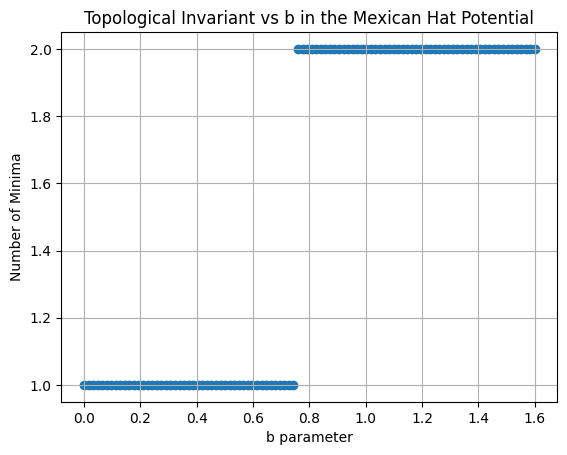

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Define the Mexican hat potential along the x-axis (y=0)
def mexican_hat_1d(x, b, a=1):
    return a * ((x**2) - b**2)**2

# Function to calculate the number of minima along the x-axis for a given b
def count_minima(b, x_range=(-3, 3), num_points=10):
    x = np.linspace(x_range[0], x_range[1], num_points)
    potential = mexican_hat_1d(x, b)
    
    # Find relative minima using argrelextrema (local minima)
    minima_indices = argrelextrema(potential, np.less)[0]
    
    # Return the number of minima
    return len(minima_indices)

# Function to calculate the invariant for a range of b values and plot it
def plot_invariant_vs_b():
    b_values = np.linspace(0, 1.6, 100)  # Vary b from 0 to 3
    minima_counts = [count_minima(b) for b in b_values]  # Calculate minima for each b
    
    plt.scatter(b_values, minima_counts, label='Number of Minima')
    plt.xlabel('b parameter')
    plt.ylabel('Number of Minima')
    plt.title('Topological Invariant vs b in the Mexican Hat Potential')
    plt.grid(True)
    # plt.legend()
    plt.show()

# Plot the invariant vs b
plot_invariant_vs_b()


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from scipy.signal import argrelextrema

# Define the Mexican hat potential in polar coordinates (r, theta)
def mexican_hat_potential_polar(r, b, a=1):
    return a * (r**2 - b**2)**2

# Convert polar coordinates (r, theta) to Cartesian (x, y) for 3D plotting
def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Define the Mexican hat potential along the x-axis (y=0) for 1D minima calculation
def mexican_hat_1d(x, b, a=1):
    return a * ((x**2) - b**2)**2

# Function to calculate the number of minima along the x-axis for a given b
def count_minima(b, x_range=(-3, 3), num_points=10):  # Reduced resolution
    x = np.linspace(x_range[0], x_range[1], num_points)
    potential = mexican_hat_1d(x, b)
    
    # Find relative minima using argrelextrema (local minima)
    minima_indices = argrelextrema(potential, np.less)[0]
    
    # Return the number of minima
    return len(minima_indices)

# Function to create a GIF showing both the Mexican hat potential and invariant
def plot_mexican_hat_with_invariant_gif(b_values, gif_name='mexican_hat_invariant.gif'):
    """
    Creates a GIF that shows the evolution of the Mexican hat potential in 3D (top)
    and the topological invariant (number of minima) in 2D (bottom).

    Args:
        - b_values: List or array of b values for the Mexican hat potential.
        - gif_name: Str: Name of the output GIF file.
    """
    r = np.linspace(0, 2, 500)  # Radial distance for polar plot
    theta = np.linspace(0, 2 * np.pi, 500)  # Angular component
    R, Theta = np.meshgrid(r, theta)

    # Convert polar grid to Cartesian for 3D plotting
    X, Y = polar_to_cartesian(R, Theta)

    # Create list of filenames for GIF creation
    filenames = []

    minima_counts = []  # To store minima counts for invariant plot

    for i, value in enumerate(b_values):
        # 3D surface for Mexican hat potential
        Z = mexican_hat_potential_polar(R, value)
        
        # Calculate the number of minima for the invariant
        minima_count = count_minima(value)
        minima_counts.append(minima_count)

        # Create a figure with subplots (2 rows: top = 3D, bottom = 2D)
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]})

        # Plot the 3D Mexican hat potential (Top)
        ax1 = fig.add_subplot(211, projection='3d')
        surface = ax1.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none", alpha=0.7)
        
        # ax1.set_box_aspect([1, 1, 0.5])  # Aspect ratio of the box
        # ax1.set_xticks([])  # Remove X-axis ticks
        # ax1.set_yticks([])  # Remove Y-axis ticks
        # ax1.set_zticks([])  # Optionally remove Z-axis ticks for a cleaner look

        # ax1.set_axis_off()

        ax1.set_xlim(-2, 2)
        ax1.set_ylim(-2, 2)
        ax1.set_zlim(0, np.max(Z))
        ax1.set_xlabel('X axis')
        ax1.set_ylabel('Y axis')
        ax1.set_zlabel('Potential V(r, θ)')
        ax1.set_title(f'Mexican Hat Potential with b = {value:.2f}')

        # Plot the topological invariant (Bottom)
        ax2.scatter(b_values[:i+1], minima_counts, color='b', label='Topological invariant')
        ax2.set_xlim(b_values[0], b_values[-1])
        ax2.set_ylim(0, 3)  # Set limits to 0-3 to represent minima counts
        ax2.set_xlabel('b parameter')
        ax2.set_ylabel('Number of Minima')
        ax2.set_title('Topological Invariant vs b')
        ax2.grid(True)
        ax2.legend()

        for ax in fig.get_axes():
            if not ax.has_data():
                ax.set_axis_off() 

        # Save the plot to a file
        filename = f'frame_{i}.png'
        plt.savefig(filename)
        plt.close(fig)
        filenames.append(filename)

    # Create GIF from saved frames
    with imageio.get_writer(gif_name, mode='I', duration=0.5) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Clean up temporary files
    for filename in filenames:
        os.remove(filename)

    print(f'GIF saved as {gif_name}')

# Example usage
b_values = np.linspace(0, 1.6, 36)
plot_mexican_hat_with_invariant_gif(b_values)


/var/folders/rh/7blq947d6s9d_5cpytnb2pxm0000gn/T/ipykernel_67212/2897352429.py:107: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as mexican_hat_invariant.gif
